In [1]:
# required Python imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
from scipy.stats import norm, iqr

In [2]:
# Set Nature-like plots
import matplotlib as mpl
# Figure size
mpl.rcParams['figure.figsize'] = 6.2, 5.0
# Set x axis
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.major.size'] = 6
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['xtick.top'] = True
# Set y axis
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.major.size'] = 6
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.right'] = True
# Font sizes
mpl.rcParams['axes.labelsize'] = 19
mpl.rcParams['xtick.labelsize'] = 17
mpl.rcParams['ytick.labelsize'] = 17
mpl.rcParams['legend.fontsize'] = 17
mpl.rcParams['font.size'] = 17
# Font Family
#mpl.rcParams['font.family'] = 'Open Sans'
# Set line widths
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['grid.linewidth'] = 1
mpl.rcParams['lines.linewidth'] = 2.0
mpl.rcParams['lines.markersize'] = 12
# Remove legend frame
mpl.rcParams['legend.frameon'] = False

In [3]:
dataset = pd.read_csv('output/2024-04-11_step7_lamb1987_noise.csv')
dataset

,Euler1,Euler2,Euler3,misorientation,misor_noise
0,0,0,0,0.283,14.323
1,0,0,7,0.178,12.760
2,0,0,14,0.000,0.403
3,0,0,21,0.270,14.540
4,0,0,28,0.272,7.221
...,...,...,...,...,...
4389,84,84,147,0.011,9.681
4390,84,84,154,0.013,7.017
4391,84,84,161,0.009,8.840
4392,84,84,168,0.011,8.646


In [4]:
dataset[['misorientation', 'misor_noise']].describe()

,misorientation,misor_noise
count,4394.000000,4394.000000
mean,0.034053,5.242438
std,0.174068,3.545016
min,0.000000,0.061000
25%,0.003000,2.655000
50%,0.004000,4.405500
75%,0.011000,7.003750
max,6.753000,28.140000


## Visualize distributions

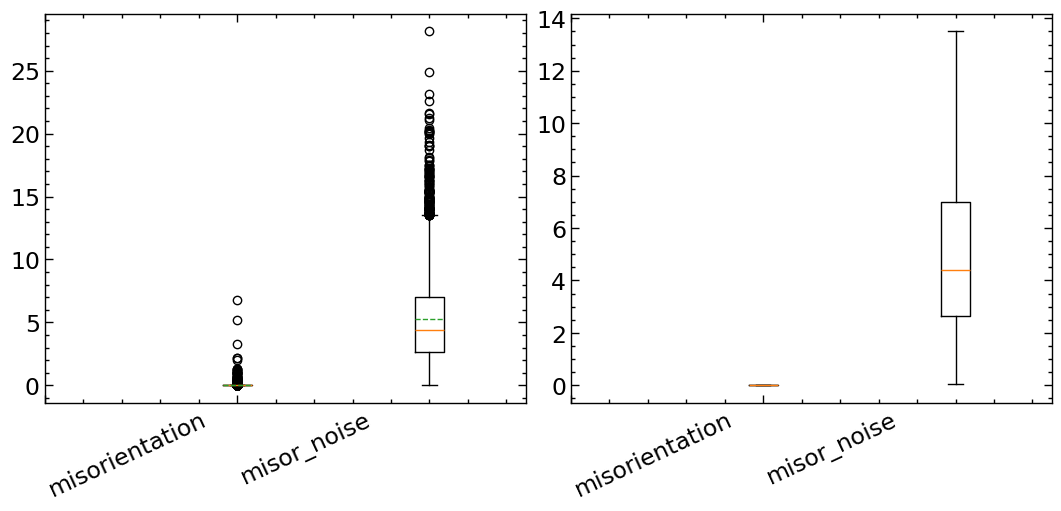

In [13]:
labels = ['misorientation', 'misor_noise']

fig1, (ax1, ax2) = plt.subplots(ncols=2, figsize=(5*2.1,5), constrained_layout=True)

ax1.boxplot(dataset[labels], meanline=True, showmeans=True, labels=labels)
ax1.set_xticks(np.arange(2), labels, rotation=25, ha='left') 

ax2.boxplot(dataset[labels], showfliers=False, labels=labels)
_ = ax2.set_xticks(np.arange(2), labels, rotation=25, ha='left') 


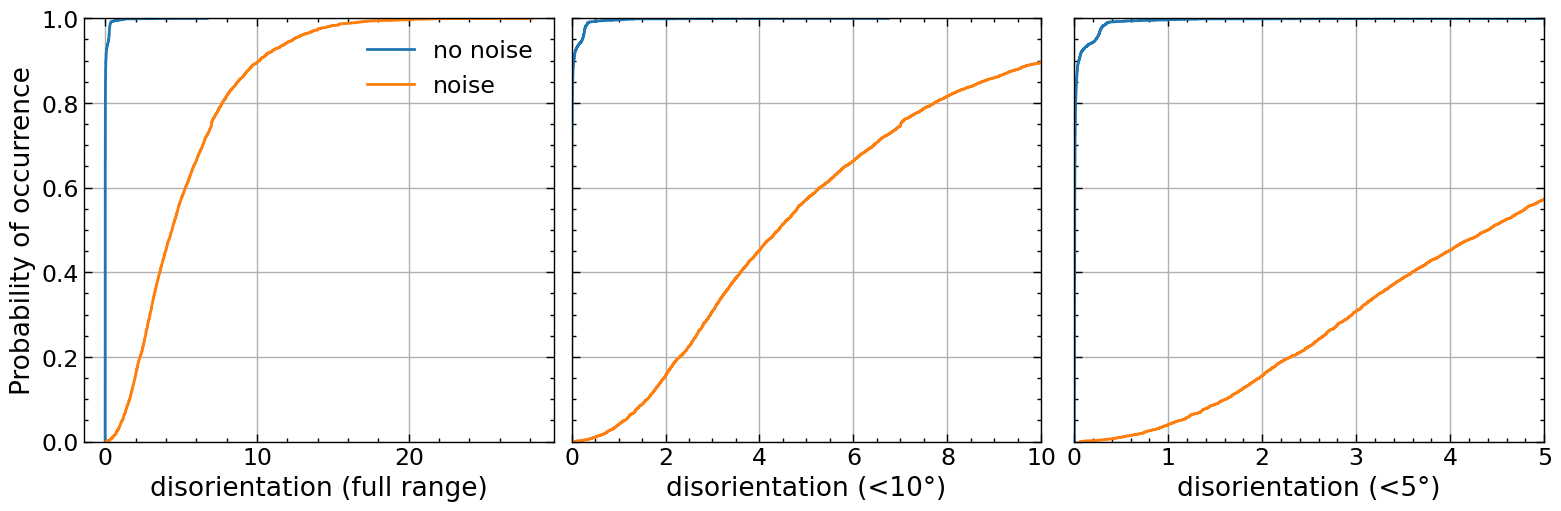

In [16]:
fig2, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(5*3.1, 5), sharey=True, constrained_layout=True)

ax1.ecdf(dataset['misorientation'], label='no noise')
ax1.ecdf(dataset['misor_noise'], label='noise')
ax1.grid(True)
ax1.set_xlabel('disorientation (full range)')
ax1.set_ylabel("Probability of occurrence")
ax1.legend(loc='best')

ax2.ecdf(dataset['misorientation'], label='no noise')
ax2.ecdf(dataset['misor_noise'], label='noise')
ax2.set_xlim(left=0, right=10)
ax2.grid(True)
ax2.set_xlabel('disorientation (<10°)')

ax3.ecdf(dataset['misorientation'], label='no noise')
ax3.ecdf(dataset['misor_noise'], label='noise')
ax3.set_xlim(left=0, right=5)
ax3.set_xlabel('disorientation (<5°)')
_ = ax3.grid(True)

In [17]:
def median_ci(pop, n, ci=0.95):
    """ Estimate the approximate ci 95% error margins for the median
    using a rule of thumb based on Hollander and Wolfe (1999).
    """

    z_score = norm.ppf(1 - (1 - ci) / 2)  # two-tailed z score

    id_upper = 1 + (n / 2) + (z_score * np.sqrt(n)) / 2
    id_lower = (n / 2) - (z_score * np.sqrt(n)) / 2

    if int(np.ceil(id_upper)) >= len(pop):
        upper_ci, lower_ci = pop[-1], pop[int(np.floor(id_lower))]
    else:
        upper_ci, lower_ci = pop[int(np.ceil(id_upper))], pop[int(np.floor(id_lower))]
    interval = upper_ci - lower_ci

    return (lower_ci, upper_ci), interval

def median(pop, ci=0.95):
    """ Returns the median, the interquartile length, and the confidence
    intervals for the median based on th rule-of-thumb method of Hollander
    and Wolfe (1999).
    """
    pop, n = np.sort(pop), len(pop)
    median, iqr_range = np.median(pop), iqr(pop)

    # compute confidence intervals
    ci_limits, length = median_ci(pop, n, ci)

    return median, iqr_range, ci_limits, length

In [19]:
mid_samples, iqr_samples, ci_samples, length_samples = median(dataset['misorientation'])
mid_noise_samples, iqr_noise_samples, ci_noise_samples, length_noise_samples = median(dataset['misor_noise'])

print('EVALUATION OF ALGORITHMS USING DISORIENTATION IN DEGREES (ROBUST APPROACH)')
print('')
print('No noise')
print(f'Median: {mid_samples:.3f}; CI(min,max): {ci_samples}')
print(f'   IQR: {iqr_samples:.3f}; length: {length_samples:.3f}')
print('')
print('with noises')
print(f'Median: {mid_noise_samples:.3f}; CI(min,max): {ci_noise_samples}')
print(f'   IQR: {iqr_noise_samples:.3f}; length: {length_noise_samples:.3f}')
print('')


EVALUATION OF ALGORITHMS USING DISORIENTATION IN DEGREES (ROBUST APPROACH)

No noise
Median: 0.004; CI(min,max): (0.004, 0.005)
   IQR: 0.008; length: 0.001

with noises
Median: 4.405; CI(min,max): (4.283, 4.517)
   IQR: 4.349; length: 0.234



In [20]:
# fig, ax = plt.subplots()

# ax.plot([360, 270, 180, 90], [0.004, 0.005, 0.004, 0.008], 'o-', label='median')
# ax.plot([360, 270, 180, 90], [0.0074, 0.007, 0.008, 0.015], 'h-', label='IQR')
# ax.set_xticks([90, 180, 270, 360])  
# ax.set_ylabel('disorientation')
# ax.set_xlabel('azimuthal range (°) , n=16')
# ax.legend(loc='best')

## Percent of wrong estimates

In [23]:
print('% of wrong estimates:')
print(f"Percent above 1 degree (no noise): {100 * (dataset['misorientation'] > 1).mean():.2f} %")
print()
print('WITH NOISE')
print(f"Percent above 1 degree (noise): {100 * (dataset['misor_noise'] > 1).mean():.2f} %")
print(f"Percent above 5 degree (noise): {100 * (dataset['misor_noise'] > 5).mean():.2f} %")
print(f"Percent above 10 degree (noise): {100 * (dataset['misor_noise'] > 10).mean():.2f} %")


% of wrong estimates:
Percent above 1 degree (no noise): 0.36 %

WITH NOISE
Percent above 1 degree (noise): 95.97 %
Percent above 5 degree (noise): 42.79 %
Percent above 10 degree (noise): 10.47 %


Text(0.5, 0, 'disorientation (°)')

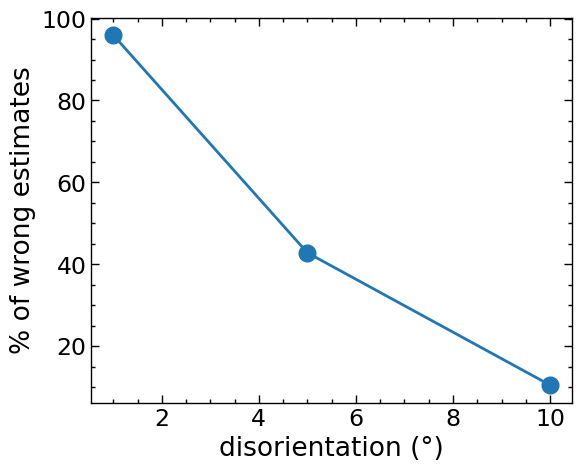

In [27]:
fig, ax = plt.subplots()

ax.plot([10, 5, 1], [10.47, 42.79, 95.97], 'o-')
ax.set_ylabel('% of wrong estimates')
ax.set_xlabel('disorientation (°)')

## Others

In [28]:
dataset[dataset['misor_noise'] > 10]

,Euler1,Euler2,Euler3,misorientation,misor_noise
0,0,0,0,0.283,14.323
1,0,0,7,0.178,12.760
3,0,0,21,0.270,14.540
5,0,0,35,0.141,11.141
11,0,0,77,0.239,12.999
...,...,...,...,...,...
4211,84,35,175,0.032,14.543
4212,84,42,0,0.019,13.007
4221,84,42,63,0.039,14.721
4290,84,63,0,0.017,10.298
